# Solar Power

## Business Understanding

### Stakeholder:
- 
-
- https://www.eia.gov/energyexplained/electricity/electricity-in-the-us.php

### True Business Problem:
With a recent push for cleaner renewable energy (company name) is seeing an increase in solar panel request. (company name) is looking the potential of solar power and how it can meet the demands of the current power consumption. 

# Data Understanding

In [312]:
# imports
import pandas as pd
import numpy as np
import requests 

from datetime import datetime as dt
from secret import keys
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Data was pulled from `https://www.eia.gov/opendata/index.php`
- In previous notebooks it was shown that I pulled in the data and created a master dataframe. From there I pulled the data down to my `data` folder within my `projects` and will use that as the source of my data.
- I originally used `parameters` to pull in the data from the website, which were:
    - `'api_key': api_key`,
    - `"frequency": "hourly"`, is pulling data in hourly.
    - `"data[]": "value"`, is the amount of energy produced
    - `"facets[fueltype][]":["SUN", "NG", "OIL"]`, energy source 
    - `"facets[respondent][]": "SOCO"`, recording location of data (Southern Company)
    - `"start": "2021-07-01"`, Time frame to pull data (start and end date)
    - `"end": "2022-07-29"`,
    - `"offset"`: 0
- Next, I assigned the data to list, requested the response from the website while using the above `parameters`, and assigned it to a dataframe.
    - dfs = []
    - for off in range(0, 30000, 5000):
        - params["offset"] = off
        - resp = requests.get(base_url, params=params)
        - data = resp.json()
        - df = pd.DataFrame(data['response']['data'])
        - dfs.append(df)
- Finally, I assigned the index, picked the columns that would be kept, and the target column `value`
    - df2 = pd.pivot(data=pd.concat(dfs), index='period', columns='fueltype', values='value')
- Side note: all seven notebooks were pulled down from the same website using the same parameters and process. There were a few tweaks made to certain codes to allow for specific data to be pulled in. 
    - I am using seven different dataframes because pulling the data in as one from the website created `NAN` in places were data was present. Separating the data allowed for all the necessary data to be acquired with not `NAN`.

In [313]:
!ls ../data

df2.csv
df_col.csv
df_dem.csv
df_hydro.csv
df_ng.csv
df_nuc.csv
df_oil.csv
df_oth.csv
df_sun.csv
df_wind.csv


In [314]:
df_dem = pd.read_csv('../data/df_dem.csv')
df_dem.head(2)

,Unnamed: 0,period,value
0,0,2020-07-01T00,34571
1,1,2020-07-01T01,33087


In [315]:
df_oil = pd.read_csv('../data/df_oil.csv')
df_oil.head(2)

,Unnamed: 0,period,value
0,0,2020-07-01T00,0
1,1,2020-07-01T01,-2


In [316]:
df_col = pd.read_csv('../data/df_col.csv')
df_col.head(2)

,Unnamed: 0,period,value
0,0,2020-07-01T00,6554
1,1,2020-07-01T01,6128


In [317]:
df_sun = pd.read_csv('../data/df_sun.csv')
df_sun.head(2)

,Unnamed: 0,period,value
0,0,2020-07-01T00,137
1,1,2020-07-01T01,24


In [318]:
df_gas = pd.read_csv('../data/df_ng.csv')
df_gas.head(2)

,Unnamed: 0,period,value
0,0,2020-07-01T00,20459
1,1,2020-07-01T01,19832


In [319]:
df_hydro = pd.read_csv('../data/df_hydro.csv')
df_hydro.head(2)

,Unnamed: 0,period,value
0,0,2020-07-01T00,1992
1,1,2020-07-01T01,1268


In [320]:
df_nuc = pd.read_csv('../data/df_nuc.csv')
df_nuc.head(2)

,Unnamed: 0,period,value
0,0,2020-07-01T00,5819
1,1,2020-07-01T01,5828


In [321]:
df_wind = pd.read_csv('../data/df_wind.csv')
df_wind.head(2)

,Unnamed: 0,period,value
0,0,2020-07-01T00,0
1,1,2020-07-01T01,0


In [322]:
df_oth = pd.read_csv('../data/df_oth.csv')
df_oth.head(2)

,Unnamed: 0,period,value
0,0,2020-07-01T00,311
1,1,2020-07-01T01,316


## Datetime, Index, and Resample
- Below, a `datetime` will be created and will be assigned as the `index`
- `Datetime` will make it easier to read time read timeseries plots.
- The data will resample from hourly to daily to inspect how the data behaves under a different frequency.
#### Natural Gas, Oil, Sun

In [323]:
#df['period'] = pd.to_datetime(df['period'])

In [324]:
# df = df.set_index('period')
# df = df.resample('D').sum()
# df.head()

Create separate dataframes for the target columns

In [325]:
# df_gas = df['NG']
# df_gas.head(2)

In [326]:
# df_oil = df['OIL']
# df_oil.head(2)

In [327]:
# df_sun = df['SUN']
# df_sun.head(2)

#### Hydro

In [328]:
# when imported the original row number was imported because of that I am pulling 
                                   # the columns that I need and dropping the rest.
df_hydro = df_hydro[['period', 'value']]

# Making the period (contains the date and time by hour) into a datetime column for forecasting purposes
df_hydro['period'] = pd.to_datetime(df_hydro['period'])

# Setting the new datetime column('period') as the index.
df_hydro = df_hydro.set_index('period')

# Sampling the hourly data into daily data. 
df_hydro = df_hydro.resample('D').sum()

df_hydro.head(2)

# This process will be repeated for the remaining dataframes.

,value
period,
2020-07-01,27192
2020-07-02,29241


#### Solar

In [329]:
df_sun = df_sun[['period', 'value']]

df_sun['period'] = pd.to_datetime(df_sun['period'])

df_sun = df_sun.set_index('period')

df_sun = df_sun.resample('D').sum()

df_sun.head(2)

,value
period,
2020-07-01,12912
2020-07-02,17038


#### Coal

In [330]:
df_col = df_col[['period', 'value']]

df_col['period'] = pd.to_datetime(df_col['period'])

df_col = df_col.set_index('period')

df_col = df_col.resample('D').sum()

df_col.head(2)

,value
period,
2020-07-01,129009
2020-07-02,112601


#### Natural Gas

In [331]:
df_gas = df_gas[['period', 'value']]

df_gas['period'] = pd.to_datetime(df_gas['period'])

df_gas = df_gas.set_index('period')

df_gas = df_gas.resample('D').sum()

df_gas.head(2)

,value
period,
2020-07-01,405505
2020-07-02,422388


#### Oil

In [332]:
df_oil = df_oil[['period', 'value']]

df_oil['period'] = pd.to_datetime(df_oil['period'])

df_oil = df_oil.set_index('period')

df_oil = df_oil.resample('D').sum()

df_oil.head(2)

,value
period,
2020-07-01,-15
2020-07-02,-2


#### Nuclear

In [333]:
df_nuc = df_nuc[['period', 'value']]

df_nuc['period'] = pd.to_datetime(df_nuc['period'])

df_nuc = df_nuc.set_index('period')

df_nuc = df_nuc.resample('D').sum()

df_nuc.head(2)

,value
period,
2020-07-01,140217
2020-07-02,140339


#### Wind

In [334]:
df_wind = df_wind[['period', 'value']]

df_wind['period'] = pd.to_datetime(df_wind['period'])

df_wind = df_wind.set_index('period')

df_wind = df_wind.resample('D').sum()

df_wind.head(2)

,value
period,
2020-07-01,0
2020-07-02,0


#### Other

In [335]:
df_oth = df_oth[['period', 'value']]

df_oth['period'] = pd.to_datetime(df_oth['period'])

df_oth = df_oth.set_index('period')

df_oth = df_oth.resample('D').sum()

df_oth.head(2)

,value
period,
2020-07-01,7461
2020-07-02,7153


#### Demand

In [336]:
df_dem = df_dem[['period', 'value']]

df_dem['period'] = pd.to_datetime(df_dem['period'])

df_dem = df_dem.set_index('period')

df_dem = df_dem.resample('D').sum()

df_dem.head(2)

,value
period,
2020-07-01,701703
2020-07-02,709342


# Arima

In [19]:
# Decompose Import
from statsmodels.tsa.seasonal import seasonal_decompose

#### Gas

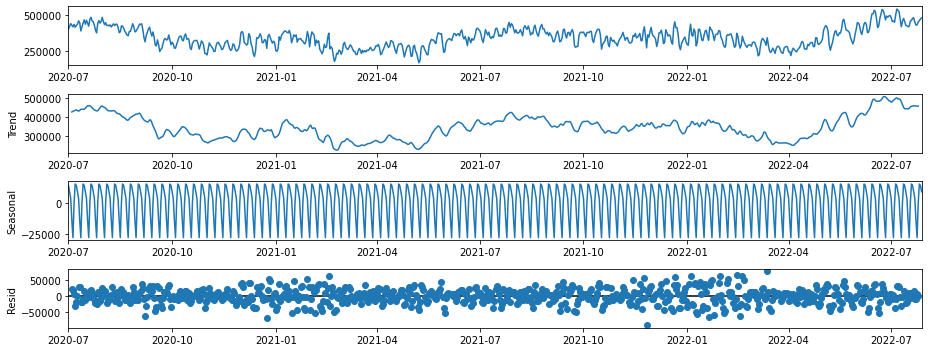

In [261]:
decomp = seasonal_decompose(df_gas)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

In [262]:
train_gas, test_gas = train_test_split(df_gas, test_size = 56, shuffle=False)

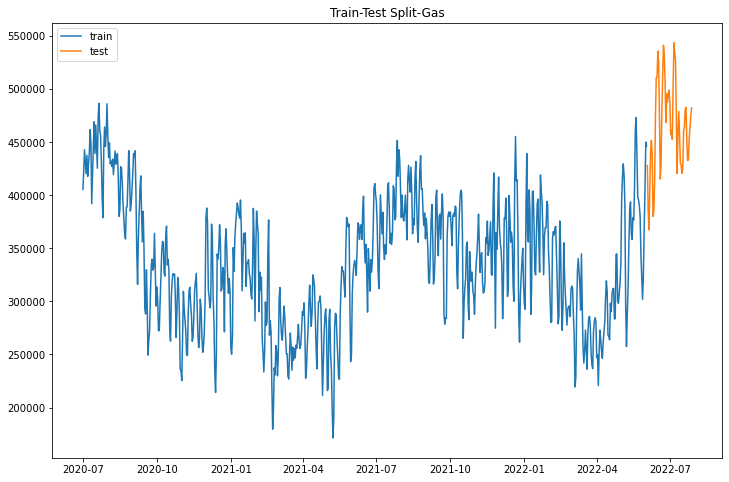

In [263]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_gas, label='train')
ax.plot(test_gas, label='test')
ax.set_title('Train-Test Split-Gas');
plt.legend();

### Conclusion:
- The model suggest that the time series is not stationary and will require differencing to make it stationary. 
- There is a seasonality of a week along with a steady trend that drops in Apr 2022 and increases drastically during June and July of 2022.

#### Oil

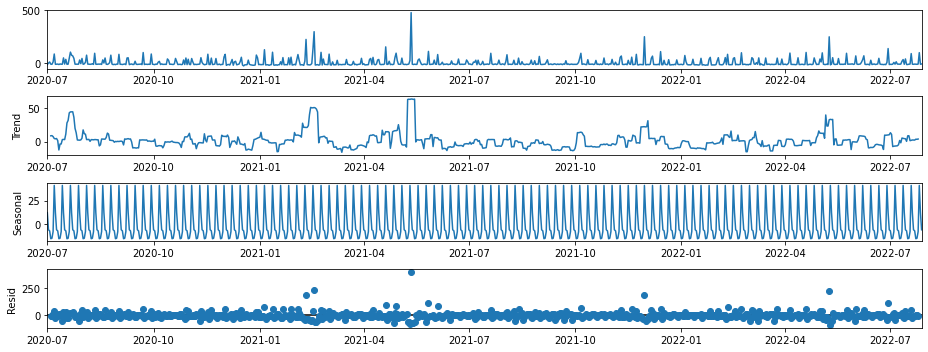

In [264]:
decomp = seasonal_decompose(df_oil)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

In [265]:
train_oil, test_oil = train_test_split(df_oil, test_size = 56, shuffle=False)

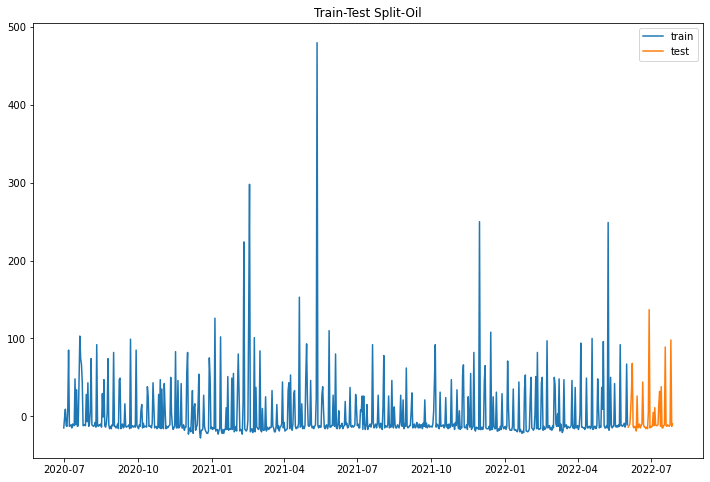

In [266]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_oil, label='train')
ax.plot(test_oil, label='test')
ax.set_title('Train-Test Split-Oil');
plt.legend();

### Conclusion:
- The model suggest that the time series is somewhat stationary and but may still require differencing. 
- There is a seasonality of a week along with a steady trend that is steady fluctuating and an observed that follows the same trend.

#### Sun

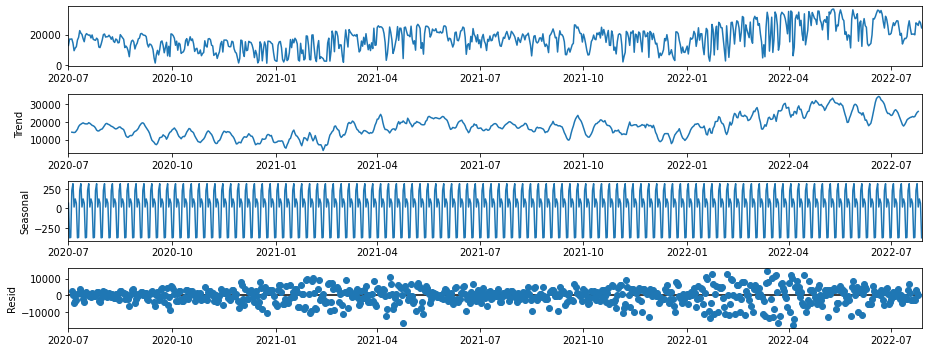

In [267]:
decomp = seasonal_decompose(df_sun)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

In [268]:
train_sun, test_sun = train_test_split(df_sun, test_size = 56, shuffle=False)

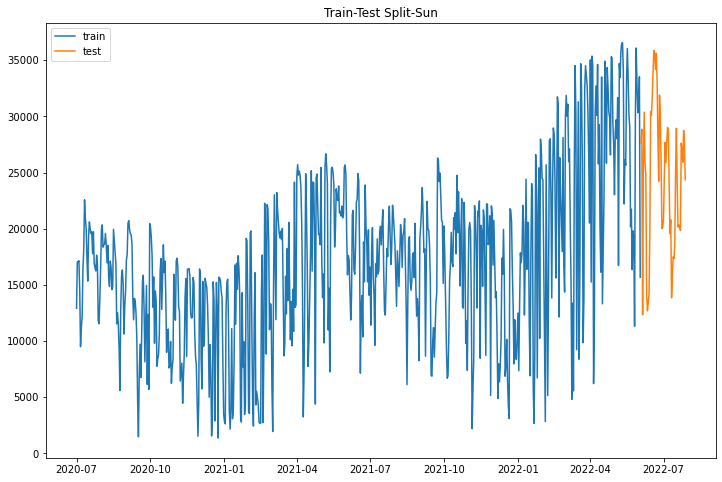

In [269]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_sun, label='train')
ax.plot(test_sun, label='test')
ax.set_title('Train-Test Split-Sun');
plt.legend();

### Conclusion:
- The model suggest that the time series is somewhat stationary and but may still require differencing. 
- There is a seasonality of a week.
- The trend is steady fluctuating with a big spike toward the later months and an observed that follows the same trend.

#### Hydro

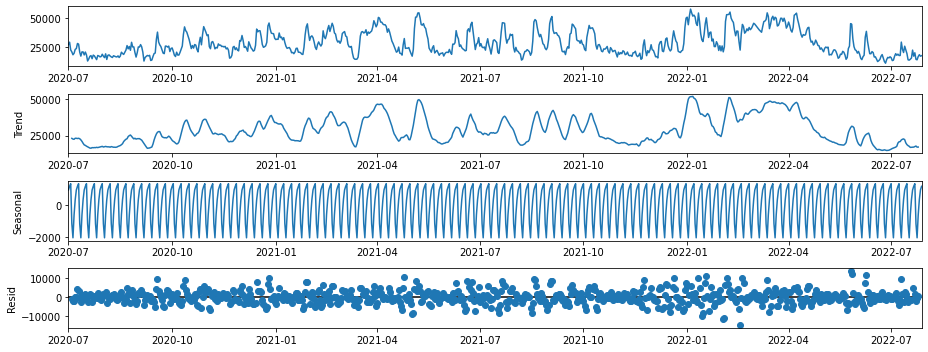

In [270]:
decomp = seasonal_decompose(df_hydro)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

In [271]:
train_hydro, test_hydro = train_test_split(df_hydro, test_size = 56, shuffle=False)

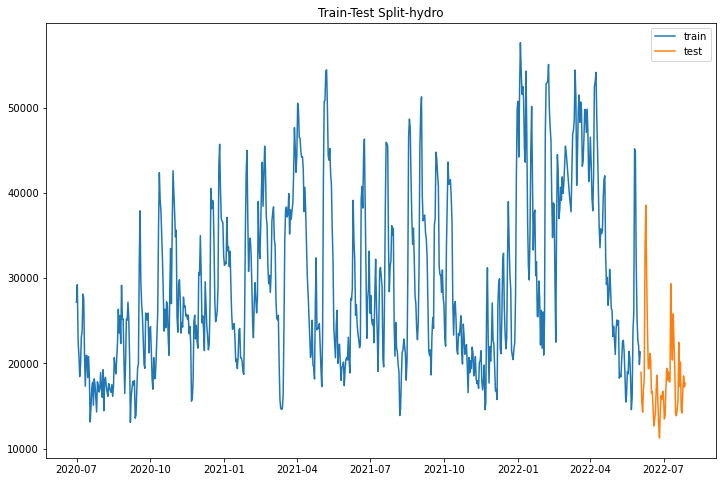

In [273]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_hydro, label='train')
ax.plot(test_hydro, label='test')
ax.set_title('Train-Test Split-hydro');
plt.legend();

### Conclusion:
- The model suggest that the time series is not stationary and will require differencing. 
- There is a seasonality of a week.
- The trend is fluctuating with a big spike toward the beginning and middle months and an observed that follows the same trend.

#### Nuclear

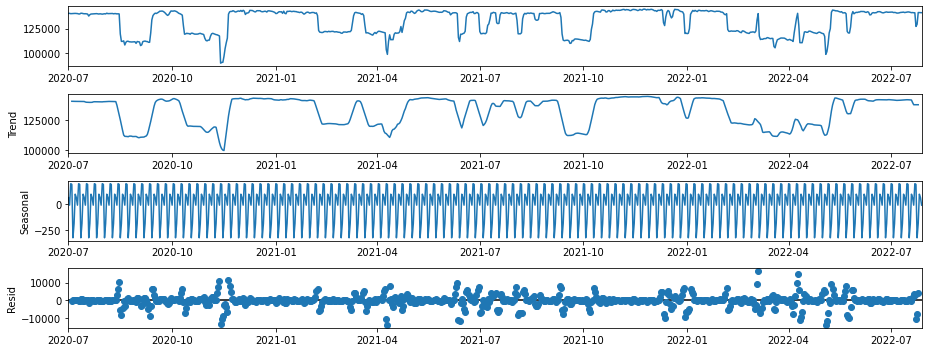

In [274]:
decomp = seasonal_decompose(df_nuc)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

In [275]:
train_nuc, test_nuc = train_test_split(df_nuc, test_size = 56, shuffle=False)

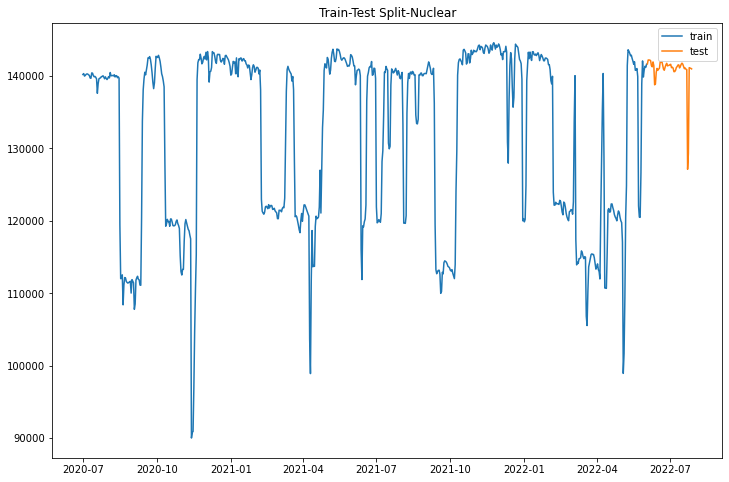

In [276]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_nuc, label='train')
ax.plot(test_nuc, label='test')
ax.set_title('Train-Test Split-Nuclear');
plt.legend();

### Conclusion:
- The model suggest that the time series is not stationary and will require differencing. 
- There is a seasonality of a week.
- The trend is fluctuating with a big spike toward the beginning, middle, and demand months with drastic drops in between. The observed follows a similar trend and the trend category.

#### Wind

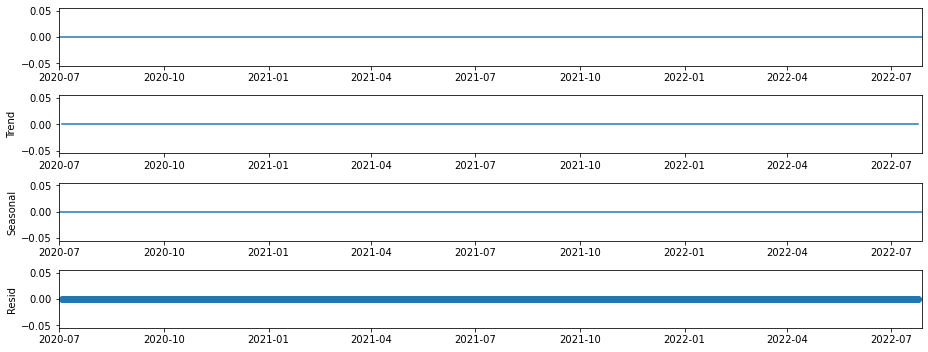

In [277]:
decomp = seasonal_decompose(df_wind)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

In [278]:
train_wind, test_wind = train_test_split(df_wind, test_size = 56, shuffle=False)

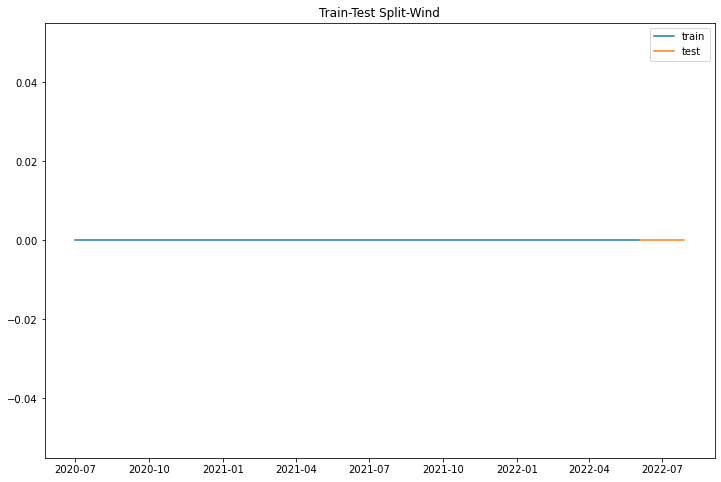

In [279]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_wind, label='train')
ax.plot(test_wind, label='test')
ax.set_title('Train-Test Split-Wind');
plt.legend();

### Conclusion:
- The model can't be used because of insufficient data (all the numbers are zero). There is no point in predicting wind. 

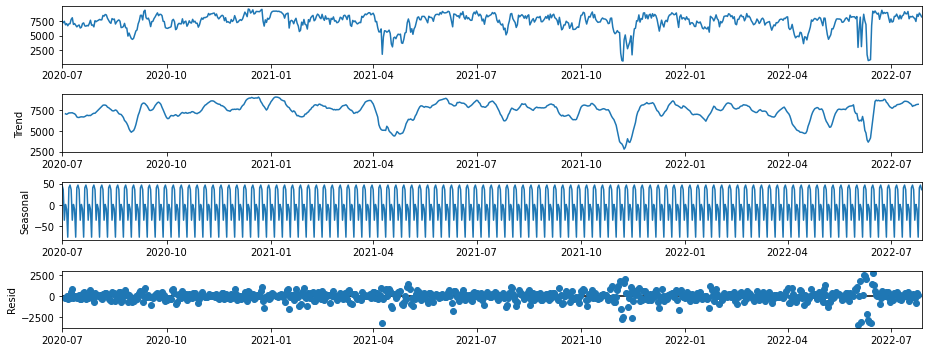

In [280]:
decomp = seasonal_decompose(df_oth)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

#### Other

In [281]:
train_oth, test_oth = train_test_split(df_oth, test_size = 56, shuffle=False)

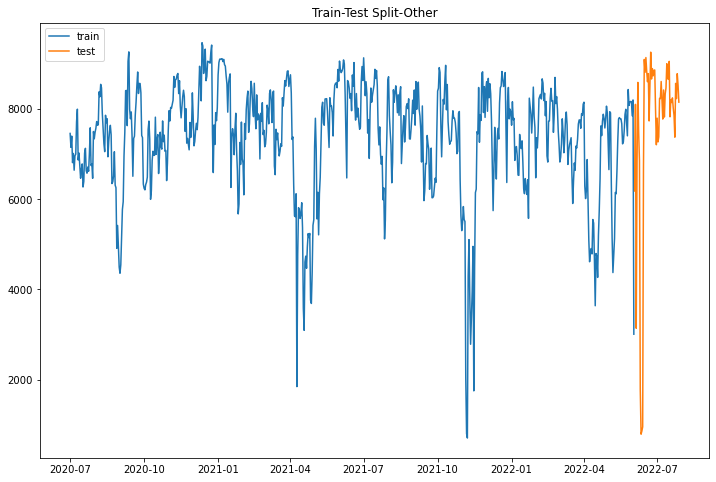

In [282]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_oth, label='train')
ax.plot(test_oth, label='test')
ax.set_title('Train-Test Split-Other');
plt.legend();

### Conclusion:
- The model suggest that the time series is not stationary and will require differencing. 
- There is a seasonality of a week.
- The trend shows a drop during three timeframes througout the year. 
- The observed follows a similar trend as the trend category.

#### Demand

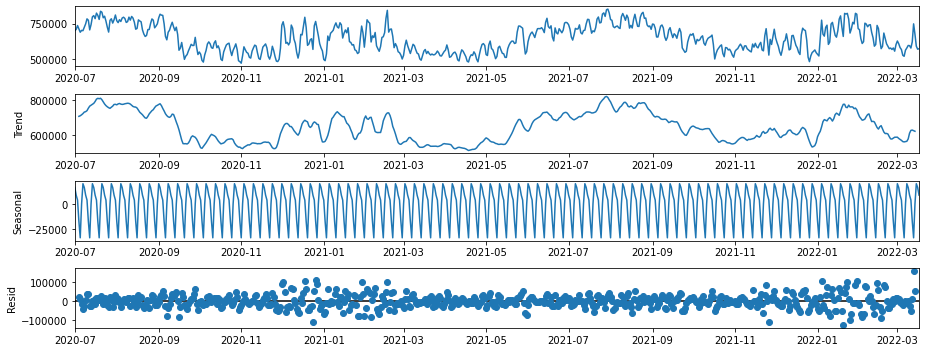

In [337]:
decomp = seasonal_decompose(df_dem)
fig = decomp.plot()
fig.set_size_inches((13, 5))
fig.tight_layout()
plt.show()

In [338]:
train_dem, test_dem = train_test_split(df_dem, test_size = 56, shuffle=False)

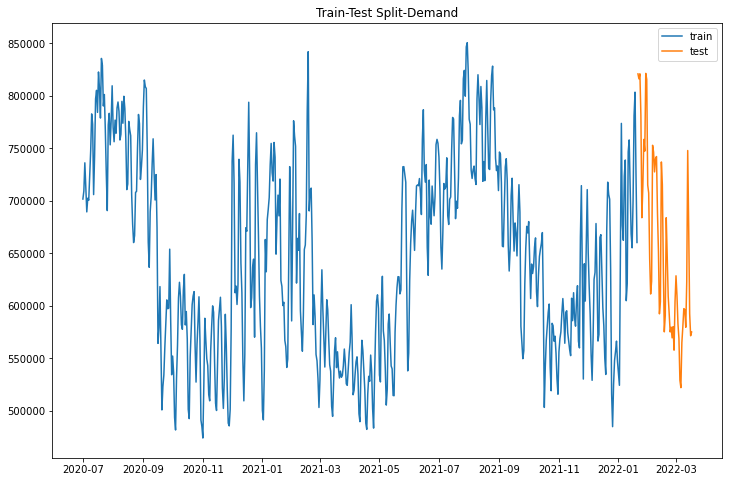

In [339]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_dem, label='train')
ax.plot(test_dem, label='test')
ax.set_title('Train-Test Split-Demand');
plt.legend();

### Conclusion:
- The model suggest that the time series is stationary given one drastic drop in demand.. 
- There is a seasonality of a week.
- The trend shows a drop during the demand drop timeframe at the later part of the year. 
- The observed follows a similar trend as the trend category.

# PMDArima and FBProphet
- I will be dropping wind from all future modeling because the values are all `0`
- I will then give the Arima models from above some differences to try pull better results.

In [340]:
# Import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from pmdarima import model_selection
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose, auto_arima
from pmdarima.arima.stationarity import ADFTest

In [341]:
from prophet import Prophet

### PMDArima Gas

In [342]:
# Checking stationarity
adf_test_gas = ADFTest()

adf_test_gas = ADFTest(alpha=0.05)
p_val_gas, should_diff_gas = adf_test_gas.should_diff(df_gas) 

print(f"P-Value: {p_val_gas}, so should you difference the data? {should_diff_gas}")

P-Value: 0.2262547435987499, so should you difference the data? True


In [343]:
arima_gas = auto_arima(train_gas,
    start_p=1,
    d=None,
    start_1=1,
    trace=True,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=16344.036, Time=1.88 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=16478.583, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=16453.061, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=16440.376, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=16476.586, Time=0.03 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=16346.556, Time=0.90 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=16347.469, Time=0.85 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=16345.524, Time=4.67 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=16345.483, Time=5.42 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=16351.451, Time=0.28 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=16344.530, Time=2.39 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=16345.611, Time=2.14 sec
 ARIMA(1,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=7.36 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=16385.111, Time=1.17 sec
 ARIMA(1,1,

In [344]:
arima_gas.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  702
Model:             SARIMAX(2, 1, 3)x(1, 0, [1], 12)   Log Likelihood               -8158.713
Date:                              Mon, 08 Aug 2022   AIC                          16333.425
Time:                                      16:25:33   BIC                          16369.846
Sample:                                           0   HQIC                         16347.503
                                              - 702                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4743      0.054     27.546      0.000       1.369       1.579
ar.L2         -0.5668      0.039    -14.707      0.000      -0.642      -0.491
ma.L1         -1.4618      0.051    -28.459      0.000      -1.562      -1.361
ma.L2          0.1885      0.050      3.804      0.000       0.091       0.286
ma.L3          0.3191      0.032     10.089      0.000       0.257       0.381
ar.S.L12       0.4826      0.156      3.103      0.002       0.178       0.788
ma.S.L12      -0.6224      0.149     -4.187      0.000      -0.914      -0.331
sigma2      7.602e+08    1.3e-10   5.86e+18      0.000     7.6e+08     7.6e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.01   Jarque-Bera (JB):                31.55
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.25
Prob(H) (two-sided):                  0.80   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.34e+34. Standard errors may be unstable.
"""

In [345]:
test_preds_gas = pd.Series(arima_gas.predict(n_periods=len(test_gas)), index=test_gas.index)

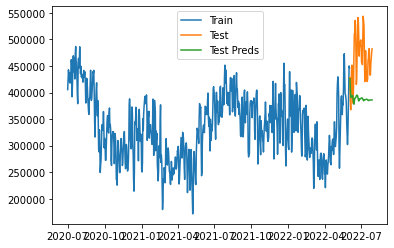

In [346]:
plt.plot(train_gas, label = 'Train')
plt.plot(test_gas, label = 'Test')
plt.plot(test_preds_gas, label = 'Test Preds')
plt.legend();

In [347]:
# Fit the best fit model from grid search SARIMAX(2, 1, 3)x(1, 0, 1, 12)
seas_arima_gas = ARIMA(train_gas,
                   order=(2, 1, 3),
                   seasonal_order=(1, 0, 1, 12))
res_sarima_gas = seas_arima_gas.fit()

# Print out summary information on the fit
print(res_sarima_gas.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  702
Model:             ARIMA(2, 1, 3)x(1, 0, [1], 12)   Log Likelihood               -8158.713
Date:                            Mon, 08 Aug 2022   AIC                          16333.425
Time:                                    16:26:26   BIC                          16369.846
Sample:                                07-01-2020   HQIC                         16347.503
                                     - 06-02-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4743      0.054     27.546      0.000       1.369       1.579
ar.L2         -0.5668      0.039   

### FBProphet

In [348]:
Model_gas = Prophet(interval_width = 0.95)

In [349]:
train_gas_pr = train_gas.reset_index()
train_gas_pr
# resetting the index for the train_gas dataframe

,period,value
0,2020-07-01,405505
1,2020-07-02,422388
2,2020-07-03,442867
3,2020-07-04,432224
4,2020-07-05,420461
...,...,...
697,2022-05-29,324109
698,2022-05-30,368909
699,2022-05-31,404136
700,2022-06-01,450210


In [354]:
train_gas_pr = train_gas_pr.rename(columns = {'period': 'ds', 'value': 'y'})
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

<AxesSubplot:xlabel='ds'>

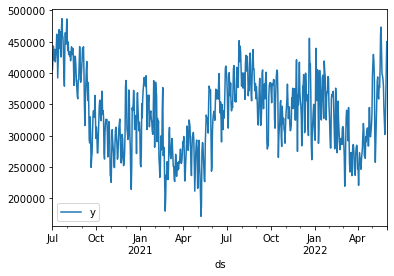

In [355]:
train_gas_pr.plot(y = 'y', x = 'ds')

In [356]:
Model_gas.fit(train_gas_pr)

16:27:38 - cmdstanpy - INFO - Chain [1] start processing
16:27:39 - cmdstanpy - INFO - Chain [1] done processing


In [357]:
# Use a weekly freqency and periods of 8 (two months)
future_gas = Model_gas.make_future_dataframe(periods = 56, freq = 'D')

In [358]:
#Predict the future dates and values
results_gas = Model_gas.predict(df = future_gas)

results_gas.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
753,2022-07-24,307671.469717,196576.624474,365892.224190,296879.719171,320066.927134,-26848.849727,-26848.849727,-26848.849727,-26848.849727,-26848.849727,-26848.849727,0.0,0.0,0.0,280822.619990
754,2022-07-25,307503.747722,227337.035047,396389.005674,296368.536758,320148.064246,1031.831428,1031.831428,1031.831428,1031.831428,1031.831428,1031.831428,0.0,0.0,0.0,308535.579150
755,2022-07-26,307336.025728,235743.806138,416577.404951,295807.515626,320366.721410,15426.872152,15426.872152,15426.872152,15426.872152,15426.872152,15426.872152,0.0,0.0,0.0,322762.897880
756,2022-07-27,307168.303733,235529.575127,410000.150953,295125.807674,320573.504136,12958.931535,12958.931535,12958.931535,12958.931535,12958.931535,12958.931535,0.0,0.0,0.0,320127.235268
757,2022-07-28,307000.581738,229824.575706,402764.218776,294689.229361,320724.540992,8063.897475,8063.897475,8063.897475,8063.897475,8063.897475,8063.897475,0.0,0.0,0.0,315064.479214


In [359]:
results_gas[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-07-01,448467.757035,353503.127547,530919.598073
1,2020-07-02,442637.484724,360579.017806,534467.937705
2,2020-07-03,436545.573155,349862.990029,524639.445639
3,2020-07-04,419163.203723,331248.747404,509281.948418
4,2020-07-05,404919.022767,320951.353724,486676.145133
...,...,...,...,...
753,2022-07-24,280822.619990,196576.624474,365892.224190
754,2022-07-25,308535.579150,227337.035047,396389.005674
755,2022-07-26,322762.897880,235743.806138,416577.404951
756,2022-07-27,320127.235268,235529.575127,410000.150953


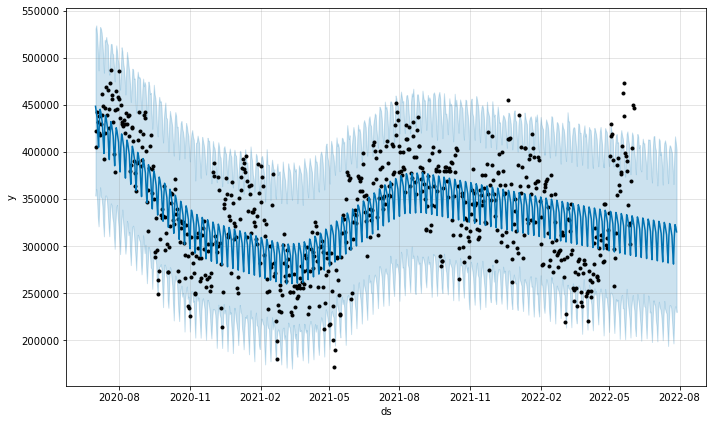

In [360]:
# plot the predictions
Model_gas.plot(results_gas);

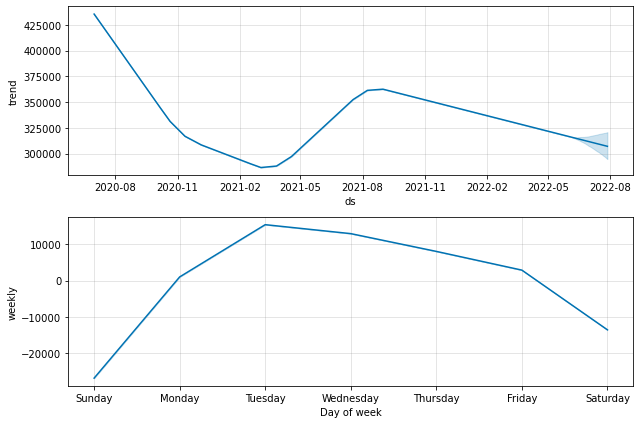

In [361]:
# Plot model components
Model_gas.plot_components(results_gas);

### Conclusion:

### PMDArima Oil

In [362]:
adf_test_oil = ADFTest()

adf_test_oil = ADFTest(alpha=0.05)
p_val_oil, should_diff_oil = adf_test_oil.should_diff(df_oil) 

print(f"P-Value: {p_val_oil}, so should you difference the data? {should_diff_oil}")

P-Value: 0.01, so should you difference the data? False


In [363]:
arima_oil = auto_arima(train_oil,
    start_p=1,
    d=None,
    start_1=1,
    trace=True,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.39 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=7145.325, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=7145.512, Time=0.61 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=7144.366, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=7144.631, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=7146.736, Time=0.20 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=7143.026, Time=1.38 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=7145.386, Time=0.58 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=7137.365, Time=4.59 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=7136.329, Time=2.87 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=7134.545, Time=2.40 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=7144.100, Time=0.48 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=7135.470, Time=3.67 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=7141.810, Time=0.91 sec
 ARIMA(1,0,0)(2,0,0)[12]

In [364]:
arima_oil.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                  702
Model:             SARIMAX(2, 0, 0, 12)   Log Likelihood               -3564.183
Date:                  Mon, 08 Aug 2022   AIC                           7134.365
Time:                          16:28:35   BIC                           7148.027
Sample:                               0   HQIC                          7139.646
                                  - 702                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0745      0.058     -1.289      0.198      -0.188       0.039
ar.S.L24      -0.1272      0.055     -2.328      0.020      -0.234      -0.020
sigma2      1503.8451     18.694     80.446      0.000    1467.206    1540.484
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):             55950.39
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             5.01
Prob(H) (two-sided):                  0.19   Kurtosis:                        45.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [365]:
test_preds_oil = pd.Series(arima_oil.predict(n_periods=len(test_oil)), index=test_oil.index)

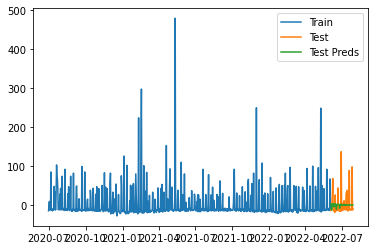

In [366]:
plt.plot(train_oil, label = 'Train')
plt.plot(test_oil, label = 'Test')
plt.plot(test_preds_oil, label = 'Test Preds')
plt.legend();

In [367]:
# Fit the best fit model from grid search SARIMAX(3, 0, 2)(0, 0, 0, 12)
seas_arima_oil = ARIMA(train_oil,
                   order=(0, 0, 0),
                   seasonal_order=(2, 0, 0, 12))
res_sarima_oil = seas_arima_oil.fit()

# Print out summary information on the fit
print(res_sarima_oil.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  702
Model:             ARIMA(2, 0, 0, 12)   Log Likelihood               -3563.273
Date:                Mon, 08 Aug 2022   AIC                           7134.545
Time:                        16:29:04   BIC                           7152.761
Sample:                    07-01-2020   HQIC                          7141.586
                         - 06-02-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6509      1.978      0.834      0.404      -2.227       5.529
ar.S.L12      -0.0768      0.060     -1.272      0.203      -0.195       0.042
ar.S.L24      -0.1290      0.056     -2.284      0.0

### FBProphet Oil

In [368]:
Model_oil = Prophet(interval_width = 0.95)

In [369]:
train_oil_pr = train_oil.reset_index()
train_oil_pr
# resetting the index for the train_gas dataframe

,period,value
0,2020-07-01,-15
1,2020-07-02,-2
2,2020-07-03,9
3,2020-07-04,-12
4,2020-07-05,-13
...,...,...
697,2022-05-29,-9
698,2022-05-30,-14
699,2022-05-31,-10
700,2022-06-01,67


In [370]:
train_oil_pr = train_oil_pr.rename(columns = {'period': 'ds', 'value': 'y'})
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

<AxesSubplot:xlabel='ds'>

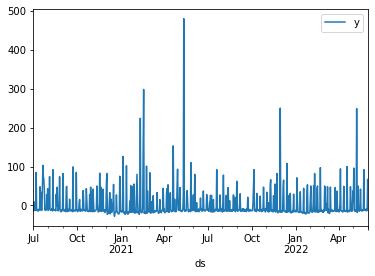

In [371]:
train_oil_pr.plot(y = 'y', x = 'ds')

In [372]:
Model_oil.fit(train_oil_pr)

16:29:25 - cmdstanpy - INFO - Chain [1] start processing
16:29:27 - cmdstanpy - INFO - Chain [1] done processing


In [373]:
# Use a weekly freqency and periods of 8 (two months)
future_oil = Model_oil.make_future_dataframe(periods = 56, freq = 'D')

In [374]:
#Predict the future dates and values
results_oil = Model_oil.predict(df = future_oil)

results_oil.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
753,2022-07-24,-0.486147,-82.151733,51.064392,-0.499015,-0.471774,-15.572073,-15.572073,-15.572073,-15.572073,-15.572073,-15.572073,0.0,0.0,0.0,-16.058220
754,2022-07-25,-0.490420,-73.042039,54.387729,-0.503611,-0.475620,-8.426309,-8.426309,-8.426309,-8.426309,-8.426309,-8.426309,0.0,0.0,0.0,-8.916729
755,2022-07-26,-0.494693,-24.892754,110.940086,-0.508207,-0.479612,42.079477,42.079477,42.079477,42.079477,42.079477,42.079477,0.0,0.0,0.0,41.584784
756,2022-07-27,-0.498966,-60.110157,80.575098,-0.513044,-0.483376,11.015826,11.015826,11.015826,11.015826,11.015826,11.015826,0.0,0.0,0.0,10.516860
757,2022-07-28,-0.503239,-70.486872,63.222261,-0.517836,-0.487336,-6.275438,-6.275438,-6.275438,-6.275438,-6.275438,-6.275438,0.0,0.0,0.0,-6.778677


In [375]:
results_oil[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-07-01,15.077481,-45.725125,81.454062
1,2020-07-02,-2.220984,-65.149098,61.325175
2,2020-07-03,-2.806374,-70.691135,61.881644
3,2020-07-04,-11.927799,-81.476591,57.494374
4,2020-07-05,-11.539218,-76.697938,58.775584
...,...,...,...,...
753,2022-07-24,-16.058220,-82.151733,51.064392
754,2022-07-25,-8.916729,-73.042039,54.387729
755,2022-07-26,41.584784,-24.892754,110.940086
756,2022-07-27,10.516860,-60.110157,80.575098


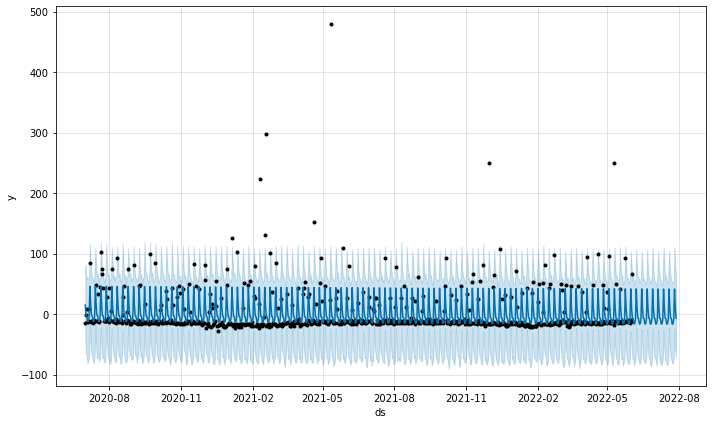

In [376]:
# plot the predictions
Model_oil.plot(results_oil);

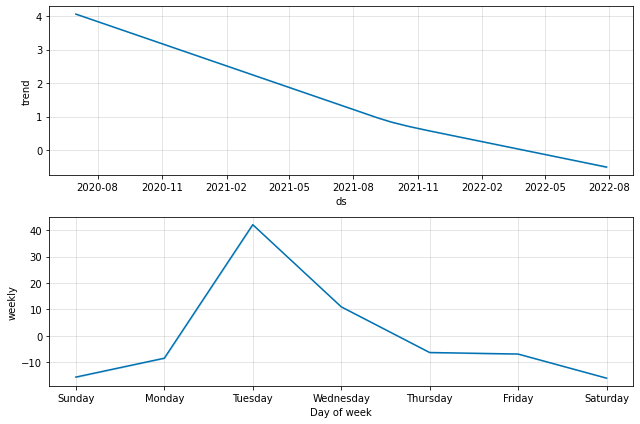

In [377]:
# Plot model components
Model_oil.plot_components(results_oil);

#### Conclusion:

### PMDArima Sun

In [378]:
adf_test_sun = ADFTest()

adf_test_sun = ADFTest(alpha=0.05)
p_val_sun, should_diff_sun = adf_test_sun.should_diff(df_sun) 

print(f"P-Value: {p_val_sun}, so should you difference the data? {should_diff_sun}")

P-Value: 0.01, so should you difference the data? False


In [379]:
arima_sun = auto_arima(train_sun,
    start_p=1,
    d=None,
    start_1=1,
    trace=True,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=4.17 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=14258.400, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=14236.264, Time=0.88 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=14173.804, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=14256.401, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=14172.372, Time=0.17 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=14173.779, Time=0.50 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=14175.672, Time=1.16 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=14066.680, Time=0.45 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=14060.634, Time=2.41 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=14070.397, Time=4.78 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=14070.721, Time=1.99 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=14068.620, Time=1.60 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=14072.683, Time=5.18 sec
 ARIMA(2,1,

In [380]:
arima_sun.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  702
Model:               SARIMAX(0, 1, 3)   Log Likelihood               -7019.027
Date:                Mon, 08 Aug 2022   AIC                          14046.055
Time:                        16:31:08   BIC                          14064.265
Sample:                             0   HQIC                         14053.093
                                - 702                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4642      0.034    -13.546      0.000      -0.531      -0.397
ma.L2         -0.3898      0.033    -11.971      0.000      -0.454      -0.326
ma.L3         -0.0597      0.032     -1.837      0.066      -0.123       0.004
sigma2      3.135e+07   5.28e-10   5.94e+16      0.000    3.14e+07    3.14e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                23.40
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.77   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [381]:
test_preds_sun = pd.Series(arima_sun.predict(n_periods=len(test_sun)), index=test_sun.index)

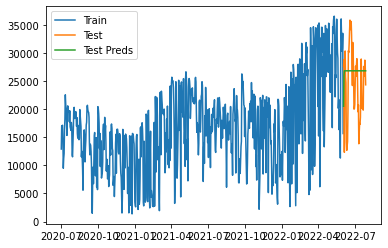

In [382]:
plt.plot(train_sun, label = 'Train')
plt.plot(test_sun, label = 'Test')
plt.plot(test_preds_sun, label = 'Test Preds')
plt.legend();

In [383]:
# Fit the best fit model from grid search SARIMAX(0, 1, 2)x(0, 0, 0, 12)
seas_arima_sun = ARIMA(train_sun,
                   order=(0, 1, 3),
                   seasonal_order=(0, 0, 0, 12))
res_sarima_sun = seas_arima_sun.fit()

# Print out summary information on the fit
print(res_sarima_sun.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  702
Model:                 ARIMA(0, 1, 3)   Log Likelihood               -7019.027
Date:                Mon, 08 Aug 2022   AIC                          14046.055
Time:                        16:31:23   BIC                          14064.265
Sample:                    07-01-2020   HQIC                         14053.093
                         - 06-02-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4642      0.034    -13.546      0.000      -0.531      -0.397
ma.L2         -0.3898      0.033    -11.971      0.000      -0.454      -0.326
ma.L3         -0.0597      0.032     -1.837      0.0

### FBProphet Sun

In [384]:
Model_sun = Prophet(interval_width = 0.95)

In [385]:
train_sun_pr = train_sun.reset_index()
train_sun_pr
# resetting the index for the train_gas dataframe

,period,value
0,2020-07-01,12912
1,2020-07-02,17038
2,2020-07-03,17001
3,2020-07-04,17148
4,2020-07-05,14474
...,...,...
697,2022-05-29,32818
698,2022-05-30,30326
699,2022-05-31,30855
700,2022-06-01,33525


In [386]:
train_sun_pr = train_sun_pr.rename(columns = {'period': 'ds', 'value': 'y'})
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

<AxesSubplot:xlabel='ds'>

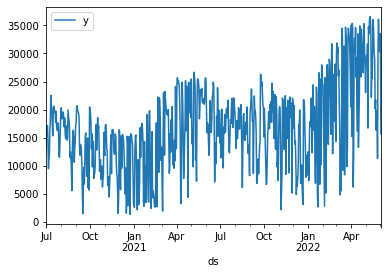

In [387]:
train_sun_pr.plot(y = 'y', x = 'ds')

In [388]:
Model_sun.fit(train_sun_pr)

16:31:42 - cmdstanpy - INFO - Chain [1] start processing
16:31:48 - cmdstanpy - INFO - Chain [1] done processing


In [389]:
# Use a weekly freqency and periods of 8 (two months)
future_sun = Model_sun.make_future_dataframe(periods = 56, freq = 'D')

In [390]:
#Predict the future dates and values
results_sun = Model_sun.predict(df = future_sun)

results_sun.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
753,2022-07-24,29657.869274,17236.339957,42930.448209,29403.256232,29916.399578,336.291750,336.291750,336.291750,336.291750,336.291750,336.291750,0.0,0.0,0.0,29994.161024
754,2022-07-25,29709.966799,16900.069837,41772.811713,29448.327947,29977.617985,27.487263,27.487263,27.487263,27.487263,27.487263,27.487263,0.0,0.0,0.0,29737.454062
755,2022-07-26,29762.064324,17958.187366,42540.047244,29493.399661,30036.005829,84.201639,84.201639,84.201639,84.201639,84.201639,84.201639,0.0,0.0,0.0,29846.265963
756,2022-07-27,29814.161849,16593.043221,41936.073659,29538.471375,30098.143524,-32.589754,-32.589754,-32.589754,-32.589754,-32.589754,-32.589754,0.0,0.0,0.0,29781.572095
757,2022-07-28,29866.259374,17331.544371,41786.390179,29583.224253,30153.125855,-419.966043,-419.966043,-419.966043,-419.966043,-419.966043,-419.966043,0.0,0.0,0.0,29446.293331


In [391]:
results_sun[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-07-01,13552.563821,1258.575912,25156.264133
1,2020-07-02,13165.600415,641.646016,25031.181486
2,2020-07-03,13337.587139,860.659231,25605.991982
3,2020-07-04,13839.359572,1449.265472,26308.678684
4,2020-07-05,13923.096858,1189.101621,25894.740124
...,...,...,...,...
753,2022-07-24,29994.161024,17236.339957,42930.448209
754,2022-07-25,29737.454062,16900.069837,41772.811713
755,2022-07-26,29846.265963,17958.187366,42540.047244
756,2022-07-27,29781.572095,16593.043221,41936.073659


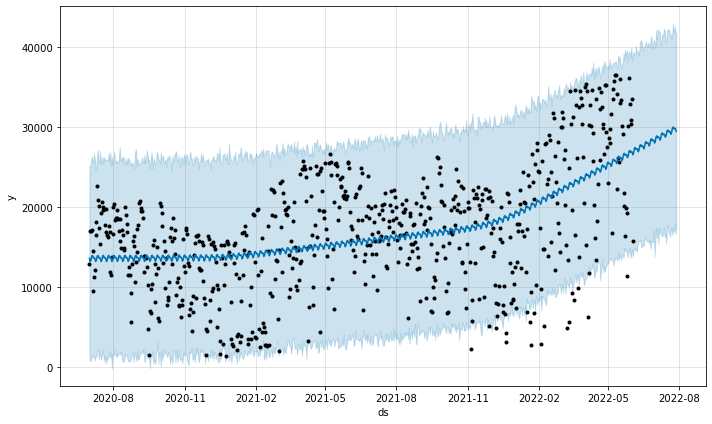

In [392]:
# plot the predictions
Model_sun.plot(results_sun);

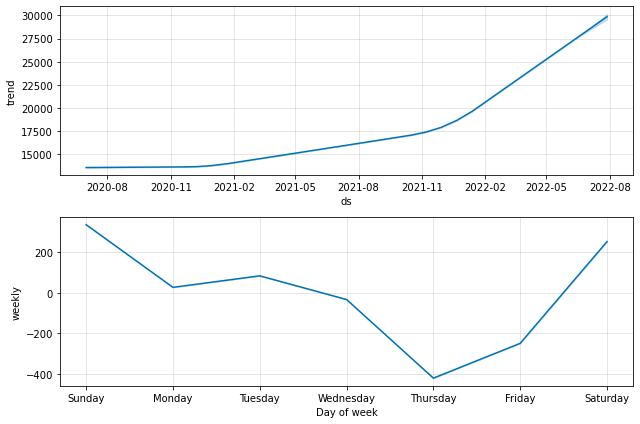

In [394]:
# Plot model components
Model_sun.plot_components(results_sun);

### Conclusion:

### PMDArima Hydro

In [395]:
adf_test_hydro = ADFTest()

adf_test_hydro = ADFTest(alpha=0.05)
p_val_hydro, should_diff_hydro = adf_test_hydro.should_diff(df_hydro) 

print(f"P-Value: {p_val_hydro}, so should you difference the data? {should_diff_hydro}")

P-Value: 0.01, so should you difference the data? False


In [396]:
arima_hydro = auto_arima(train_hydro,
    start_p=1,
    d=None,
    start_1=1,
    trace=True,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=13664.442, Time=2.98 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=13758.076, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=13724.143, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=13711.334, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=13756.079, Time=0.03 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=13664.773, Time=2.26 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=13665.380, Time=1.93 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=13661.895, Time=5.23 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=13659.916, Time=4.21 sec
 ARIMA(0,1,2)(2,0,0)[12] intercept   : AIC=13700.081, Time=1.14 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=13704.704, Time=1.95 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=9.34 sec
 ARIMA(1,1,3)(2,0,0)[12] intercept   : AIC=13661.774, Time=6.52 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=13707.116, Time=0.89 sec
 ARIMA(0,1,

In [397]:
arima_hydro.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  702
Model:             SARIMAX(1, 1, 2)x(2, 0, [], 12)   Log Likelihood               -6822.963
Date:                             Mon, 08 Aug 2022   AIC                          13657.927
Time:                                     16:33:23   BIC                          13685.242
Sample:                                          0   HQIC                         13668.485
                                             - 702                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7579      0.040     19.082      0.000       0.680       0.836
ma.L1         -0.5909      0.046    -12.836      0.000      -0.681      -0.501
ma.L2         -0.3385      0.038     -8.996      0.000      -0.412      -0.265
ar.S.L12      -0.0728      0.040     -1.839      0.066      -0.150       0.005
ar.S.L24      -0.1083      0.037     -2.933      0.003      -0.181      -0.036
sigma2      1.755e+07      1e-09   1.75e+16      0.000    1.75e+07    1.75e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               216.49
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               1.42   Skew:                             0.85
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.7e+31. Standard errors may be unstable.
"""

In [398]:
test_preds_hydro = pd.Series(arima_hydro.predict(n_periods=len(test_hydro)), index=test_hydro.index)

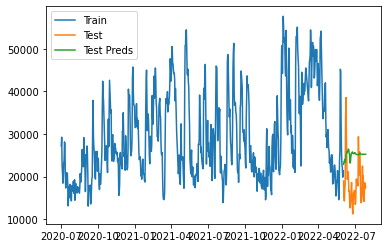

In [399]:
plt.plot(train_hydro, label = 'Train')
plt.plot(test_hydro, label = 'Test')
plt.plot(test_preds_hydro, label = 'Test Preds')
plt.legend();

In [400]:
# Fit the best fit model from grid search SARIMAX(1, 1, 2)x(0, 0, 0, 12)
seas_arima_hydro = ARIMA(train_sun,
                   order=(1, 1, 2),
                   seasonal_order=(2, 0, 0, 12))
res_sarima_hydro = seas_arima_hydro.fit()

# Print out summary information on the fit
print(res_sarima_hydro.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             value   No. Observations:                  702
Model:             ARIMA(1, 1, 2)x(2, 0, [], 12)   Log Likelihood               -7019.652
Date:                           Mon, 08 Aug 2022   AIC                          14051.304
Time:                                   16:33:43   BIC                          14078.619
Sample:                               07-01-2020   HQIC                         14061.862
                                    - 06-02-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1282      0.079      1.616      0.106      -0.027       0.284
ma.L1         -0.5947      0.075     -7.886

### FBProphet Hydro

In [401]:
Model_hydro = Prophet(interval_width = 0.95)

In [402]:
train_hydro_pr = train_hydro.reset_index()
train_hydro_pr
# resetting the index for the train_gas dataframe

,period,value
0,2020-07-01,27192
1,2020-07-02,29241
2,2020-07-03,22585
3,2020-07-04,20934
4,2020-07-05,18464
...,...,...
697,2022-05-29,25462
698,2022-05-30,22769
699,2022-05-31,22096
700,2022-06-01,19868


In [403]:
train_hydro_pr = train_hydro_pr.rename(columns = {'period': 'ds', 'value': 'y'})
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

<AxesSubplot:xlabel='ds'>

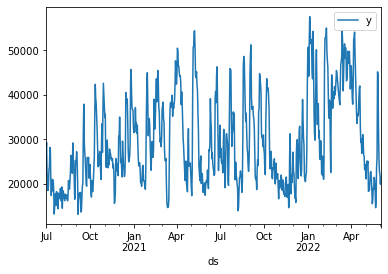

In [404]:
train_hydro_pr.plot(y = 'y', x = 'ds')

In [405]:
Model_hydro.fit(train_hydro_pr)

16:33:59 - cmdstanpy - INFO - Chain [1] start processing
16:34:05 - cmdstanpy - INFO - Chain [1] done processing


In [406]:
# Use a weekly freqency and periods of 8 (two months)
future_hydro = Model_hydro.make_future_dataframe(periods = 56, freq = 'D')

In [407]:
#Predict the future dates and values
results_hydro = Model_hydro.predict(df = future_hydro)

results_hydro.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
753,2022-07-24,34496.226570,13502.447341,49871.365864,34375.498626,34599.876351,-2033.237858,-2033.237858,-2033.237858,-2033.237858,-2033.237858,-2033.237858,0.0,0.0,0.0,32462.988712
754,2022-07-25,34506.358692,15759.820547,51385.669439,34381.569134,34614.512350,-568.690559,-568.690559,-568.690559,-568.690559,-568.690559,-568.690559,0.0,0.0,0.0,33937.668133
755,2022-07-26,34516.490815,16154.027943,52765.636614,34388.396162,34630.727262,371.541372,371.541372,371.541372,371.541372,371.541372,371.541372,0.0,0.0,0.0,34888.032187
756,2022-07-27,34526.622937,16459.099950,55070.963358,34395.229628,34643.043247,769.620846,769.620846,769.620846,769.620846,769.620846,769.620846,0.0,0.0,0.0,35296.243783
757,2022-07-28,34536.755060,16112.421061,54072.838024,34397.380160,34655.326062,1048.916196,1048.916196,1048.916196,1048.916196,1048.916196,1048.916196,0.0,0.0,0.0,35585.671256


In [408]:
results_hydro[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-07-01,22343.327001,4034.466872,40838.874339
1,2020-07-02,22655.524996,4273.063117,41298.463811
2,2020-07-03,23071.538536,3830.895888,40467.615549
3,2020-07-04,20652.237001,2040.421881,38214.100245
4,2020-07-05,19672.078877,470.671057,39304.880595
...,...,...,...,...
753,2022-07-24,32462.988712,13502.447341,49871.365864
754,2022-07-25,33937.668133,15759.820547,51385.669439
755,2022-07-26,34888.032187,16154.027943,52765.636614
756,2022-07-27,35296.243783,16459.099950,55070.963358


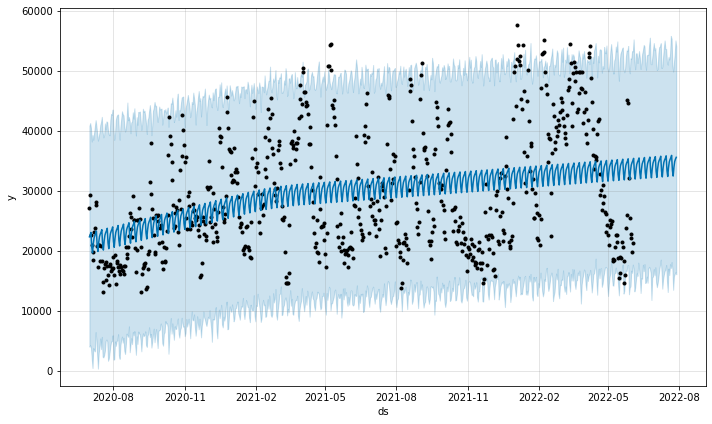

In [409]:
# plot the predictions
Model_hydro.plot(results_hydro);

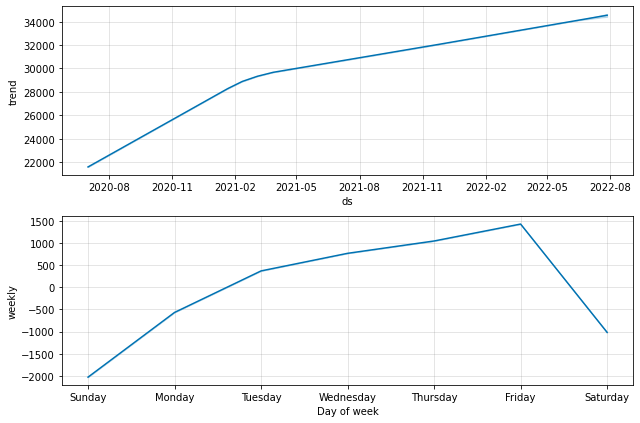

In [410]:
# Plot model components
Model_hydro.plot_components(results_hydro);

### Conclusion:

### PMDArima Nuclear

In [411]:
adf_test_nuc = ADFTest()

adf_test_nuc = ADFTest(alpha=0.05)
p_val_nuc, should_diff_nuc = adf_test_nuc.should_diff(df_nuc) 

print(f"P-Value: {p_val_nuc}, so should you difference the data? {should_diff_nuc}")

P-Value: 0.01, so should you difference the data? False


In [412]:
arima_nuc = auto_arima(train_nuc,
    start_p=1,
    d=None,
    start_1=1,
    trace=True,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=13528.713, Time=4.22 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=15217.358, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=13595.860, Time=1.17 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=14716.572, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=18551.521, Time=0.03 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=13527.978, Time=0.71 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=13527.031, Time=0.16 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=13528.319, Time=2.41 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=14031.869, Time=0.59 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=13526.085, Time=0.13 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=13527.341, Time=1.75 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=13526.988, Time=0.51 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=13527.743, Time=2.33 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=14476.448, Time=0.38 sec
 ARIM

In [413]:
arima_nuc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  702
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -6759.042
Date:                Mon, 08 Aug 2022   AIC                          13526.085
Time:                        16:34:37   BIC                          13544.301
Sample:                             0   HQIC                         13533.125
                                - 702                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7886.1337   1979.231      3.984      0.000    4006.912    1.18e+04
ar.L1          0.9402      0.015     61.175      0.000       0.910       0.970
ma.L1          0.3191      0.030     10.563      0.000       0.260       0.378
sigma2      1.348e+07      6.157   2.19e+06      0.000    1.35e+07    1.35e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              9870.72
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.41   Skew:                            -2.04
Prob(H) (two-sided):                  0.01   Kurtosis:                        20.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.57e+24. Standard errors may be unstable.
"""

In [414]:
test_preds_nuc = pd.Series(arima_nuc.predict(n_periods=len(test_nuc)), index=test_nuc.index)

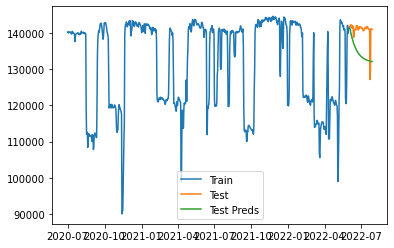

In [415]:
plt.plot(train_nuc, label = 'Train')
plt.plot(test_nuc, label = 'Test')
plt.plot(test_preds_nuc, label = 'Test Preds')
plt.legend();

In [416]:
# Fit the best fit model from grid search SARIMAX(0, 1, 1)x(0, 0, 0, 12)
seas_arima_nuc = ARIMA(train_nuc,
                   order=(1, 0, 1),
                   seasonal_order=(0, 0, 0, 12))
res_sarima_nuc = seas_arima_nuc.fit()

# Print out summary information on the fit
print(res_sarima_nuc.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  702
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -6758.146
Date:                Mon, 08 Aug 2022   AIC                          13524.293
Time:                        16:34:51   BIC                          13542.508
Sample:                    07-01-2020   HQIC                         13531.333
                         - 06-02-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.317e+05   2899.317     45.441      0.000    1.26e+05    1.37e+05
ar.L1          0.9199      0.017     52.665      0.000       0.886       0.954
ma.L1          0.3305      0.032     10.326      0.0

### FBProphet Nuclear

In [417]:
Model_nuc = Prophet(interval_width = 0.95)

In [418]:
train_nuc_pr = train_nuc.reset_index()
train_nuc_pr
# resetting the index for the train_gas dataframe

,period,value
0,2020-07-01,140217
1,2020-07-02,140339
2,2020-07-03,139989
3,2020-07-04,140081
4,2020-07-05,140227
...,...,...
697,2022-05-29,139858
698,2022-05-30,140818
699,2022-05-31,141335
700,2022-06-01,141204


In [419]:
train_nuc_pr = train_nuc_pr.rename(columns = {'period': 'ds', 'value': 'y'})
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

<AxesSubplot:xlabel='ds'>

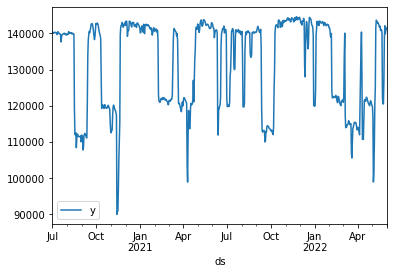

In [420]:
train_nuc_pr.plot(y = 'y', x = 'ds')

In [421]:
Model_nuc.fit(train_nuc_pr)

16:34:56 - cmdstanpy - INFO - Chain [1] start processing
16:35:03 - cmdstanpy - INFO - Chain [1] done processing


In [422]:
# Use a weekly freqency and periods of 8 (two months)
future_nuc = Model_nuc.make_future_dataframe(periods = 56, freq = 'D')

In [423]:
#Predict the future dates and values
results_nuc = Model_nuc.predict(df = future_nuc)

results_nuc.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
753,2022-07-24,119828.171210,96460.643413,142851.922841,119352.028084,120257.302535,-312.560353,-312.560353,-312.560353,-312.560353,-312.560353,-312.560353,0.0,0.0,0.0,119515.610857
754,2022-07-25,119761.758564,96729.046829,142075.597339,119271.454872,120202.014898,-272.724705,-272.724705,-272.724705,-272.724705,-272.724705,-272.724705,0.0,0.0,0.0,119489.033859
755,2022-07-26,119695.345917,97206.394789,144000.515657,119191.340353,120146.464579,69.965556,69.965556,69.965556,69.965556,69.965556,69.965556,0.0,0.0,0.0,119765.311473
756,2022-07-27,119628.933271,96381.867095,142320.261448,119119.568148,120088.808868,132.000018,132.000018,132.000018,132.000018,132.000018,132.000018,0.0,0.0,0.0,119760.933289
757,2022-07-28,119562.520624,96317.295979,143769.342691,119041.601413,120031.361510,62.450276,62.450276,62.450276,62.450276,62.450276,62.450276,0.0,0.0,0.0,119624.970900


In [424]:
results_nuc[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-07-01,130909.362585,108686.066222,150994.975378
1,2020-07-02,130839.290645,108052.528767,154064.384535
2,2020-07-03,130868.892866,108378.301431,154078.203649
3,2020-07-04,131004.090484,108155.499069,153210.598733
4,2020-07-05,130462.713420,106382.776500,154469.128891
...,...,...,...,...
753,2022-07-24,119515.610857,96460.643413,142851.922841
754,2022-07-25,119489.033859,96729.046829,142075.597339
755,2022-07-26,119765.311473,97206.394789,144000.515657
756,2022-07-27,119760.933289,96381.867095,142320.261448


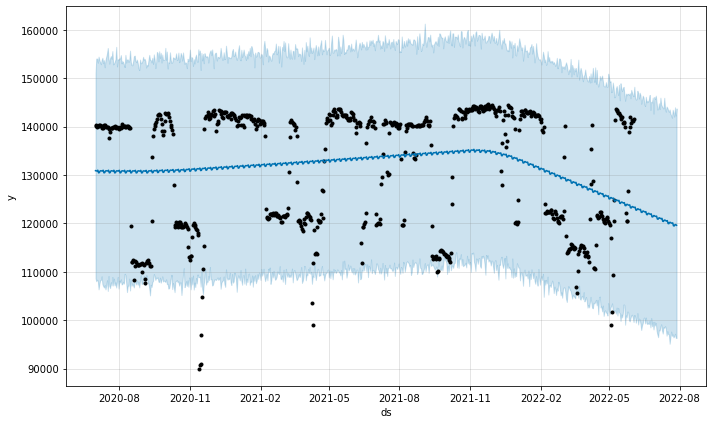

In [425]:
# plot the predictions
Model_nuc.plot(results_nuc);

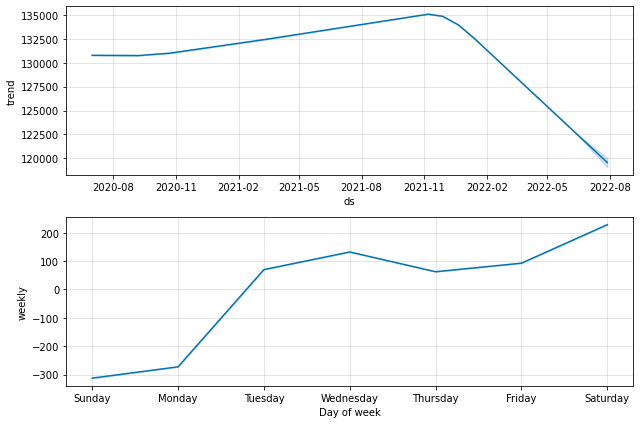

In [426]:
# Plot model components
Model_nuc.plot_components(results_nuc);

### Conclusion:

### PMDArima Other

In [427]:
adf_test_oth = ADFTest()

adf_test_oth = ADFTest(alpha=0.05)
p_val_oth, should_diff_oth = adf_test_oth.should_diff(df_oth) 

print(f"P-Value: {p_val_oth}, so should you difference the data? {should_diff_oth}")

P-Value: 0.01, so should you difference the data? False


In [428]:
arima_oth = auto_arima(train_oth,
    start_p=1,
    d=None,
    start_1=1,
    trace=True,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=11146.311, Time=3.99 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=12004.479, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=11143.522, Time=0.95 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=11520.041, Time=0.98 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=14515.263, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=11144.002, Time=0.06 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=11145.463, Time=4.02 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=11145.474, Time=1.55 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=11143.546, Time=0.42 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=11147.299, Time=4.42 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=12005.889, Time=0.31 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=11145.134, Time=1.05 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=11145.151, Time=1.29 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=11533.653, Time=1.48 sec
 ARIM

In [429]:
arima_oth.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  702
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood               -5567.761
Date:                            Mon, 08 Aug 2022   AIC                          11143.522
Time:                                    16:35:45   BIC                          11161.737
Sample:                                         0   HQIC                         11150.562
                                            - 702                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1108.0748     98.684     11.228      0.000     914.657    1301.492
ar.L1          0.8393      0.014     58.060      0.000       0.811       0.868
ar.S.L12       0.0603      0.041      1.486      0.137      -0.019       0.140
sigma2       4.55e+05   1.15e+04     39.561      0.000    4.32e+05    4.78e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):              3004.32
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               2.20   Skew:                            -1.55
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [430]:
test_preds_oth = pd.Series(arima_oth.predict(n_periods=len(test_oth)), index=test_oth.index)

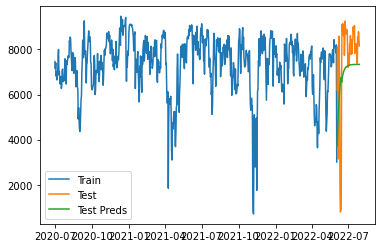

In [431]:
plt.plot(train_oth, label = 'Train')
plt.plot(test_oth, label = 'Test')
plt.plot(test_preds_oth, label = 'Test Preds')
plt.legend();

In [433]:
# Fit the best fit model from grid search SARIMAX(1, 0, 0)x(0, 0, 0, 12)
seas_arima_oth = ARIMA(train_oth,
                   order=(1, 0, 0),
                   seasonal_order=(1, 0, 0, 12))
res_sarima_oth = seas_arima_oth.fit()

# Print out summary information on the fit
print(res_sarima_oth.summary())

                                    SARIMAX Results                                     
Dep. Variable:                            value   No. Observations:                  702
Model:             ARIMA(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood               -5567.736
Date:                          Mon, 08 Aug 2022   AIC                          11143.473
Time:                                  16:36:01   BIC                          11161.688
Sample:                              07-01-2020   HQIC                         11150.513
                                   - 06-02-2022                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7361.3604    216.727     33.966      0.000    6936.582    7786.138
ar.L1          0.8450      0.014     58.533      0.

### FBProphet Other

In [434]:
Model_oth = Prophet(interval_width = 0.95)

In [435]:
train_oth_pr = train_oth.reset_index()
train_oth_pr
# resetting the index for the train_gas dataframe

,period,value
0,2020-07-01,7461
1,2020-07-02,7153
2,2020-07-03,7402
3,2020-07-04,6813
4,2020-07-05,7017
...,...,...
697,2022-05-29,8170
698,2022-05-30,8166
699,2022-05-31,7853
700,2022-06-01,8204


In [436]:
train_oth_pr = train_oth_pr.rename(columns = {'period': 'ds', 'value': 'y'})
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

<AxesSubplot:xlabel='ds'>

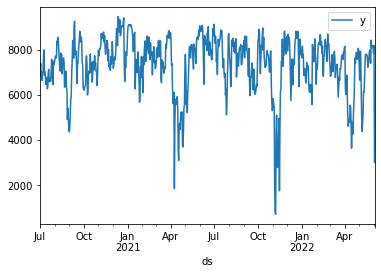

In [437]:
train_oth_pr.plot(y = 'y', x = 'ds')

In [438]:
Model_oth.fit(train_oth_pr)

16:36:11 - cmdstanpy - INFO - Chain [1] start processing
16:36:17 - cmdstanpy - INFO - Chain [1] done processing


In [439]:
# Use a weekly freqency and periods of 8 (two months)
future_oth = Model_oth.make_future_dataframe(periods = 56, freq = 'D')

In [440]:
#Predict the future dates and values
results_oth = Model_oth.predict(df = future_oth)

results_oth.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
753,2022-07-24,6949.262820,4613.866773,9414.641894,6936.340849,6962.679503,65.468436,65.468436,65.468436,65.468436,65.468436,65.468436,0.0,0.0,0.0,7014.731256
754,2022-07-25,6948.012840,4526.214421,9066.029771,6934.526325,6961.922467,-59.305216,-59.305216,-59.305216,-59.305216,-59.305216,-59.305216,0.0,0.0,0.0,6888.707624
755,2022-07-26,6946.762861,4576.391498,9388.093756,6932.970997,6961.171193,2.891200,2.891200,2.891200,2.891200,2.891200,2.891200,0.0,0.0,0.0,6949.654061
756,2022-07-27,6945.512882,4473.243401,9184.288259,6931.511631,6960.428673,-10.113487,-10.113487,-10.113487,-10.113487,-10.113487,-10.113487,0.0,0.0,0.0,6935.399394
757,2022-07-28,6944.262902,4523.501105,9288.207958,6930.052266,6959.673978,-2.946262,-2.946262,-2.946262,-2.946262,-2.946262,-2.946262,0.0,0.0,0.0,6941.316640


In [441]:
results_oth[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-07-01,7349.697095,4945.564551,9682.021690
1,2020-07-02,7358.098028,4785.810974,9804.830933
2,2020-07-03,7348.846243,4768.275187,9686.165902
3,2020-07-04,7380.948791,4916.421682,9737.287926
4,2020-07-05,7430.213851,4958.977267,9645.837242
...,...,...,...,...
753,2022-07-24,7014.731256,4613.866773,9414.641894
754,2022-07-25,6888.707624,4526.214421,9066.029771
755,2022-07-26,6949.654061,4576.391498,9388.093756
756,2022-07-27,6935.399394,4473.243401,9184.288259


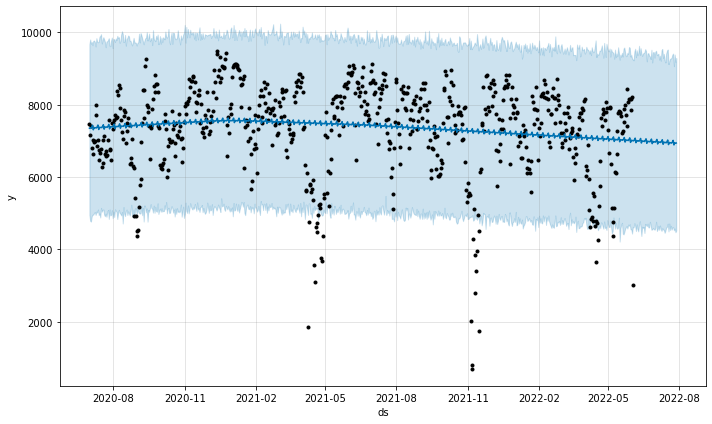

In [442]:
# plot the predictions
Model_oth.plot(results_oth);

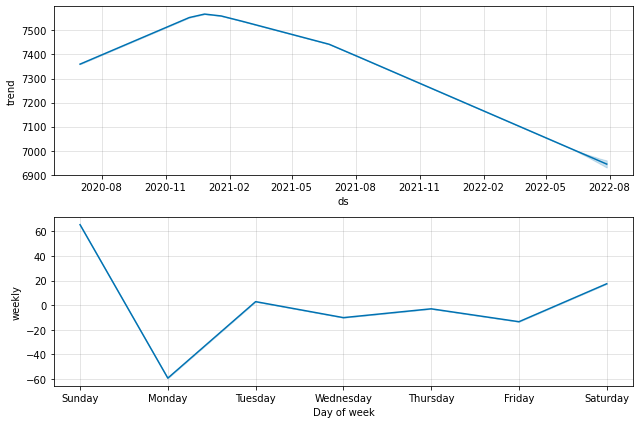

In [443]:
# Plot model components
Model_oth.plot_components(results_oth);

### Conclusion:

### PMDArima Demand

In [444]:
adf_test_dem = ADFTest()

adf_test_dem = ADFTest(alpha=0.05)
p_val_dem, should_diff_dem = adf_test_dem.should_diff(df_dem) 

print(f"P-Value: {p_val_dem}, so should you difference the data? {should_diff_dem}")

P-Value: 0.10557719168025126, so should you difference the data? True


In [445]:
arima_dem = auto_arima(train_dem,
    start_p=1,
    d=None,
    start_1=1,
    trace=True,
    m=12,
    seasonal=True) 

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=13664.310, Time=1.28 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=13736.837, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=13719.646, Time=0.28 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=13711.996, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=13734.840, Time=0.02 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=13663.427, Time=0.83 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=13667.605, Time=0.26 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=13664.030, Time=2.46 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=13663.977, Time=0.72 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=13666.015, Time=2.63 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=13685.925, Time=0.42 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=13704.213, Time=0.67 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=13664.922, Time=0.89 sec
 ARIMA(1,1,3)(0,0,1)[12] intercept   : AIC=13664.044, Time=1.64 sec
 ARIM

In [446]:
arima_dem.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  569
Model:             SARIMAX(1, 1, 2)x(0, 0, [1], 12)   Log Likelihood               -6825.706
Date:                              Mon, 08 Aug 2022   AIC                          13661.411
Time:                                      16:37:01   BIC                          13683.122
Sample:                                           0   HQIC                         13669.883
                                              - 569                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5380      0.048     11.248      0.000       0.444       0.632
ma.L1         -0.4694      0.047    -10.070      0.000      -0.561      -0.378
ma.L2         -0.3000      0.018    -16.309      0.000      -0.336      -0.264
ma.S.L12      -0.0908      0.020     -4.653      0.000      -0.129      -0.053
sigma2      1.489e+09   1.71e-11   8.73e+19      0.000    1.49e+09    1.49e+09
===================================================================================
Ljung-Box (L1) (Q):                   1.93   Jarque-Bera (JB):                95.41
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                             0.43
Prob(H) (two-sided):                  0.12   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.5e+35. Standard errors may be unstable.
"""

In [447]:
test_preds_dem = pd.Series(arima_dem.predict(n_periods=len(test_dem)), index=test_dem.index)

In [448]:
test_dem.index[-1] 

Timestamp('2022-03-17 00:00:00', freq='D')

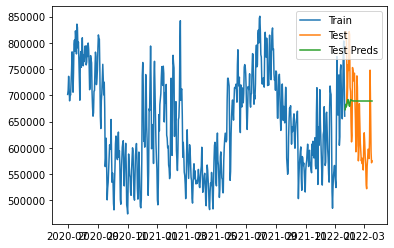

In [449]:
plt.plot(train_dem, label = 'Train')
plt.plot(test_dem, label = 'Test')
plt.plot(test_preds_dem, label = 'Test Preds')
plt.legend();

In [450]:
# Fit the best fit model from grid search SARIMAX(0, 1, 3)x(0, 0, 1, 12)
seas_arima_dem = ARIMA(train_dem,
                   order=(1, 1, 2),
                   seasonal_order=(0, 0, 1, 12))
res_sarima_dem = seas_arima_hydro.fit()

# Print out summary information on the fit
print(res_sarima_dem.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             value   No. Observations:                  702
Model:             ARIMA(1, 1, 2)x(2, 0, [], 12)   Log Likelihood               -7019.652
Date:                           Mon, 08 Aug 2022   AIC                          14051.304
Time:                                   16:37:25   BIC                          14078.619
Sample:                               07-01-2020   HQIC                         14061.862
                                    - 06-02-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1282      0.079      1.616      0.106      -0.027       0.284
ma.L1         -0.5947      0.075     -7.886

In [149]:
pd.date_range("2022-07-29", periods=len(test_dem), freq='D')

DatetimeIndex(['2022-07-29', '2022-07-30', '2022-07-31', '2022-08-01',
               '2022-08-02', '2022-08-03', '2022-08-04', '2022-08-05',
               '2022-08-06', '2022-08-07', '2022-08-08', '2022-08-09',
               '2022-08-10', '2022-08-11', '2022-08-12', '2022-08-13',
               '2022-08-14', '2022-08-15', '2022-08-16', '2022-08-17',
               '2022-08-18', '2022-08-19', '2022-08-20', '2022-08-21',
               '2022-08-22', '2022-08-23', '2022-08-24', '2022-08-25',
               '2022-08-26', '2022-08-27', '2022-08-28', '2022-08-29',
               '2022-08-30', '2022-08-31', '2022-09-01', '2022-09-02',
               '2022-09-03', '2022-09-04', '2022-09-05', '2022-09-06',
               '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-10',
               '2022-09-11', '2022-09-12', '2022-09-13', '2022-09-14',
               '2022-09-15', '2022-09-16', '2022-09-17', '2022-09-18',
               '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22'],
     

### FBProphet Demand

In [150]:
import itertools
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

In [151]:
Model_dem = Prophet(interval_width = 0.95)

In [152]:
train_dem_pr = train_dem.reset_index()
train_dem_pr
# resetting the index for the train_gas dataframe

,period,value
0,2021-07-01,741754
1,2021-07-02,711026
2,2021-07-03,655926
3,2021-07-04,635038
4,2021-07-05,670098
...,...,...
332,2022-05-29,635584
333,2022-05-30,684677
334,2022-05-31,727593
335,2022-06-01,773271


In [153]:
train_dem_pr = train_dem_pr.rename(columns = {'period': 'ds', 'value': 'y'})
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

In [154]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(train_dem_pr)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

14:49:38 - cmdstanpy - INFO - Chain [1] start processing
14:49:39 - cmdstanpy - INFO - Chain [1] done processing
14:49:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:49:39 - cmdstanpy - INFO - Chain [1] start processing
14:49:41 - cmdstanpy - INFO - Chain [1] done processing
14:50:04 - cmdstanpy - INFO - Chain [1] start processing
14:50:06 - cmdstanpy - INFO - Chain [1] done processing
14:50:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:50:06 - cmdstanpy - INFO - Chain [1] start processing
14:50:08 - cmdstanpy - INFO - Chain [1] done processing
14:50:30 - cmdstanpy - INFO - Chain [1] start processing
14:50:32 - cmdstanpy - INFO - Chain [1] done processing
14:50:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

    changepoint_prior_scale  seasonality_prior_scale           rmse
0                     0.001                     0.01   97554.101700
1                     0.001                     0.10   96794.019451
2                     0.001                     1.00   97068.475205
3                     0.001                    10.00   95320.300550
4                     0.010                     0.01   98455.608983
5                     0.010                     0.10   99237.489786
6                     0.010                     1.00   98647.986059
7                     0.010                    10.00   98880.200486
8                     0.100                     0.01  110232.723161
9                     0.100                     0.10  110039.822822
10                    0.100                     1.00  110094.555383
11                    0.100                    10.00  110284.021084
12                    0.500                     0.01  115943.988892
13                    0.500                     

In [155]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0}


In [156]:
Model_dem_2 = Prophet(interval_width = 0.95, changepoint_prior_scale = 0.001, seasonality_prior_scale = 10.0)

In [157]:
train_dem_pr = train_dem.reset_index()
train_dem_pr
# resetting the index for the train_gas dataframe

,period,value
0,2021-07-01,741754
1,2021-07-02,711026
2,2021-07-03,655926
3,2021-07-04,635038
4,2021-07-05,670098
...,...,...
332,2022-05-29,635584
333,2022-05-30,684677
334,2022-05-31,727593
335,2022-06-01,773271


In [158]:
train_dem_pr = train_dem_pr.rename(columns = {'period': 'ds', 'value': 'y'})
# rename the columns to 'ds'(time column) and 'y'(metric column), 
# this will the dataframe to fall within the conditions the fbprophet imposes

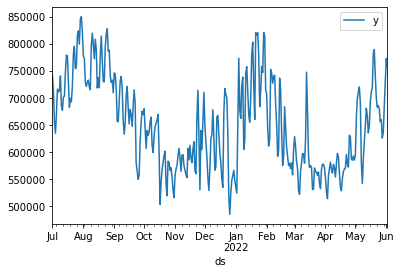

In [159]:
train_dem_pr.plot(y = 'y', x = 'ds');

In [160]:
Model_dem_2.fit(train_dem_pr)

14:55:42 - cmdstanpy - INFO - Chain [1] start processing
14:55:44 - cmdstanpy - INFO - Chain [1] done processing
14:55:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
14:55:44 - cmdstanpy - INFO - Chain [1] start processing
14:55:46 - cmdstanpy - INFO - Chain [1] done processing


In [161]:
# Use a weekly freqency and periods of 8 (two months)
future_dem = Model_dem_2.make_future_dataframe(periods = 56, freq = 'D')

In [162]:
#Predict the future dates and values
results_dem = Model_dem_2.predict(df = future_dem)

results_dem.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
388,2022-07-24,580744.574314,407136.790171,700834.464956,580744.570188,580744.578787,-30666.426566,-30666.426566,-30666.426566,-30666.426566,-30666.426566,-30666.426566,0.0,0.0,0.0,550078.147748
389,2022-07-25,580420.347281,433880.526381,725531.416862,580420.343031,580420.351840,3000.895685,3000.895685,3000.895685,3000.895685,3000.895685,3000.895685,0.0,0.0,0.0,583421.242966
390,2022-07-26,580096.120248,447808.214537,733280.357978,580096.115861,580096.124908,19320.003414,19320.003414,19320.003414,19320.003414,19320.003414,19320.003414,0.0,0.0,0.0,599416.123662
391,2022-07-27,579771.893215,451419.585744,748017.713968,579771.888727,579771.898004,15113.435234,15113.435234,15113.435234,15113.435234,15113.435234,15113.435234,0.0,0.0,0.0,594885.328449
392,2022-07-28,579447.666182,436016.538247,733835.625725,579447.661596,579447.671063,9257.488029,9257.488029,9257.488029,9257.488029,9257.488029,9257.488029,0.0,0.0,0.0,588705.154211


In [163]:
results_dem[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2021-07-01,715802.151170,578610.516611,859514.260852
1,2021-07-02,707916.905398,566517.425846,857433.916318
2,2021-07-03,688174.343989,540913.239721,831078.565573
3,2021-07-04,674905.555475,524065.888600,826976.658954
4,2021-07-05,708248.650694,565361.622252,861246.372475
...,...,...,...,...
388,2022-07-24,550078.147748,407136.790171,700834.464956
389,2022-07-25,583421.242966,433880.526381,725531.416862
390,2022-07-26,599416.123662,447808.214537,733280.357978
391,2022-07-27,594885.328449,451419.585744,748017.713968


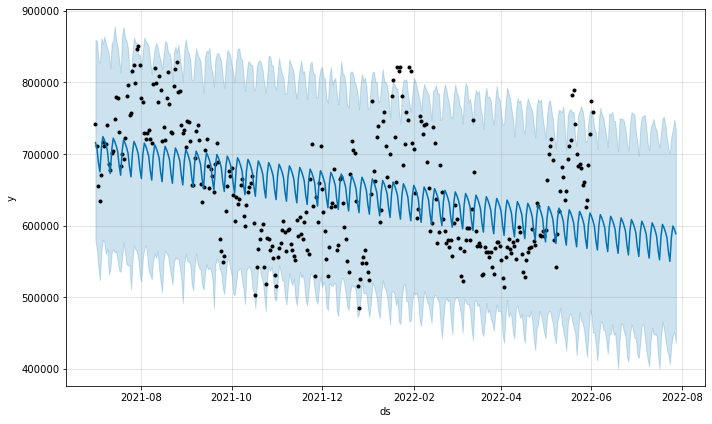

In [164]:
# plot the predictions
Model_dem_2.plot(results_dem);

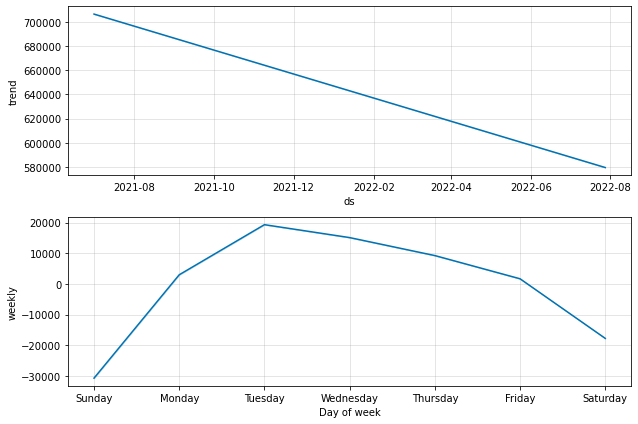

In [165]:
# Plot model components
Model_dem_2.plot_components(results_dem);

TypeError: 'NoneType' object is not subscriptable

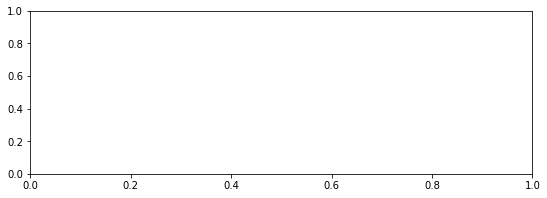

In [166]:
# Plot model components
Model_dem.plot_components(results_dem);